
# 💳 💵 Default Payments of Credit Card Clients in Taiwan (2005)

## 🎯 Objective

**The objective of this project is to perform Exploratory Data Analysis (EDA)** on the Credit Payment Default dataset in order to better understand customer behaviors and identify key variables related to default risk.

This project will serve as a **foundation for a second phase**, focused on **predictive modeling** using machine learning techniques to forecast which customers are most likely to default on their credit card payments, based on their behavior from **April 2005 to September 2005**.

## 📊 Dataset Information
### Acknowledgements
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients] at the UCI Machine Learning Repository. The CSV file that is used in this project can be downloaded from this web page. 

### 🗂 Detailed Dataset Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005, and contains a total of 25 variables.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## 🔍 Understanding Credit Cards & Dataset Variables  

### 📢 Quick Reminder: How Does a Credit Card Work?  

A credit card allows you to **spend money you don’t yet have**, as the bank is essentially lending you funds — up to a set amount called a **credit limit**.
Each time you use the card, your purchases add to your **balance**, which you’ll need to **repay later** — either in *full* or *gradually over time* (with interest).

### Context of this dataset
According to the paper *"The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients"* by I. Yeh, Che-hui Lien. 2009, Published in *Expert systems with applications*:

"In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, **most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts**."

This highlights that cardholders were often **spending beyond their means**, accumulating **significant debt** without necessarily considering their ability to repay — which led to a **higher risk of default**.

### 📊 Mapping Dataset Variables to Financial Concepts  

- **`LIMIT_BAL`** → The **predefined credit limit**, i.e., the **maximum total debt** a customer can accumulate.  
- **`BILL_AMT`** → The **total amount due** at the *end of each month*, representing the amount owed (*can include unpaid previous balances*).
- **`PAY_AMT`** → The **actual amount paid** by the client at the *end of the month*.  

While cardholders can spend freely within their approved **`LIMIT_BAL`**, failure to repay on time can result in **debt accumulation and potential default.**

### What is a Credit Card *Default* in this dataset?  
According to Paolo (2001), "Credit risk here means the **probability of a delay in the repayment of the credit granted**." (Source: [https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719?via%3Dihub])

A **credit card default** occurs when a cardholder **fails to pay the Minimum Amount Due for several consecutive months**.  
- ❌ **Occasional missed payments** → Do **not** always lead to default.  
- 🚨 **Consistent non-payment** → Significantly increases the risk of default and financial consequences.

### 📈 Predicting Defaults Using the Dataset  
To evaluate the probability of **defaulting next month** (October 2005), we rely on:  

- **Categorical repayment status variables:**  
  - `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`  
- These **indicate the client’s recent repayment history** and serve as key indicators of their **creditworthiness and financial stability.**  



## 🚧 Project In Progress 🚧

This project is **currently a work in progress**. I will be regularly updating and improving it as I move forward with the analysis and exploration of the data. 

**Last updated:** Monday April 9, 2025

Feel free to check back regularly for updates. Contributions and suggestions are welcome!

Thank you for your patience as I continue to refine and complete the project.

# PART I: Exploratory Data Analysis & Visualization

## Data Import & Initial Exploration

In [203]:
# Import libraries

import numpy as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore

# Download the csv file 
df = pd.read_csv('/Users/elodiechen/Downloads/Jupyter_Notebooks/default_of_credit_card_clients.csv', delimiter =';')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [204]:
# Tell Pandas to use the second line as column names and ignore the first row

pd.set_option('display.max_columns', 25) # Set the maximum number of columns to be displayed (This ensures that all 25 columns are displayed)

df = pd.read_csv('/Users/elodiechen/Downloads/Jupyter_Notebooks/default_of_credit_card_clients.csv', delimiter =';', header=1) 
df 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Descriptive Statistics Study

In [205]:
pd.set_option('display.max_rows', 25) # This ensures that all 25 rows are displayed
df.info() # The following items provide information on column data type and number of missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are no missing values in any column, according to the 'Non-Null Count'.

And the data type (Dtype) indicates that all columns are numerical.

In [206]:
df.isnull().sum()  # Another way to check for missing values: count the number of empty cells in each column.

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [207]:
# Summary Statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Initial Insights into the Dataset

#### `AGE`
From this table, we can see that clients are aged between 21 and 79 years old, with a distribution skewed toward younger cardholders:
The median age is 34,
75% of the 30,000 clients are under 41.

#### `LIMIT_BAL`
Looking at LIMIT_BAL, credit limits range from 10,000 to 1,000,000 NT$, but most clients are on the lower end of the scale:
75% have a credit limit below 240,000 NT$.

#### `BILL_AMTX`
While many variables (such as AGE, LIMIT_BAL, and PAY_AMTX) show expected patterns, the BILL_AMTX columns include some unusual values.

For example, we observe significantly negative amounts (e.g., -339,603 in BILL_AMT6), which may seem surprising at first. These likely indicate rare situations where a client has overpaid or received a refund, resulting in a temporary credit balance — meaning the bank owes money to the client, not the reverse.
Though these cases appear infrequent, they’re likely valid and simply highlight the importance of carefully interpreting financial data. Still, such values may be worth flagging for further investigation.

#### What’s Next?
👉 These initial findings will be further illustrated and explored through visual analysis in the next sections, to better understand patterns across client profiles and credit behaviors.

In [208]:
# Random display of a 5-line sample 
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
22733,22734,190000,2,3,1,47,1,2,0,0,0,0,194487,189894,185512,169728,143260,136901,92,7791,4000,2865,40000,0,0
27191,27192,230000,1,1,2,34,-1,-1,-1,-1,-1,-1,476,476,476,476,476,4145,476,476,476,476,4145,476,0
8069,8070,220000,1,2,1,47,-2,-2,-2,-2,-2,-2,7625,8325,1497,0,0,7625,8334,1497,0,0,7625,2226,0
3813,3814,60000,2,2,1,42,0,0,0,0,0,0,58264,57923,58987,17350,17937,17298,3200,3000,800,1000,1000,1000,0
23687,23688,50000,2,2,1,50,2,2,2,2,2,2,27525,28669,28569,30097,29858,31229,1900,650,2300,550,2000,0,1


In [209]:
print(df.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [210]:
# Displaying the unique values for each relevant categorical column

categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']
# Excluding ID, AGE, LIMIT_BAL, BILL_AMT, and PAY_AMT,
# as they are more continuous variables than categorical.
# Their distributions will be analyzed later using more appropriate visualizations.

for i in categorical_cols:
    a = df[i].dropna().unique()  # For each categorical column listed above, we drop the NaN values and extract the unique values.
    a.sort()                     # Then, we sort the extracted unique values.
    print(f'{i}', a, '\n')       # Finally, we print the unique values for each categorical column.


SEX [1 2] 

EDUCATION [0 1 2 3 4 5 6] 

MARRIAGE [0 1 2 3] 

PAY_0 [-2 -1  0  1  2  3  4  5  6  7  8] 

PAY_2 [-2 -1  0  1  2  3  4  5  6  7  8] 

PAY_3 [-2 -1  0  1  2  3  4  5  6  7  8] 

PAY_4 [-2 -1  0  1  2  3  4  5  6  7  8] 

PAY_5 [-2 -1  0  2  3  4  5  6  7  8] 

PAY_6 [-2 -1  0  2  3  4  5  6  7  8] 

default payment next month [0 1] 



In [211]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Convert categorical columns to 'category' type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check the data types
print(df.dtypes)

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
dtype: object


### Outliers
Let's visualize the presence of outliers in continuous numerical variables: LIMIT_BAL, BILL_AMT1 to BILL_AMT6 and PAY_AMT1 to PAY_AMT6

#### Outliers detection with Boxplots

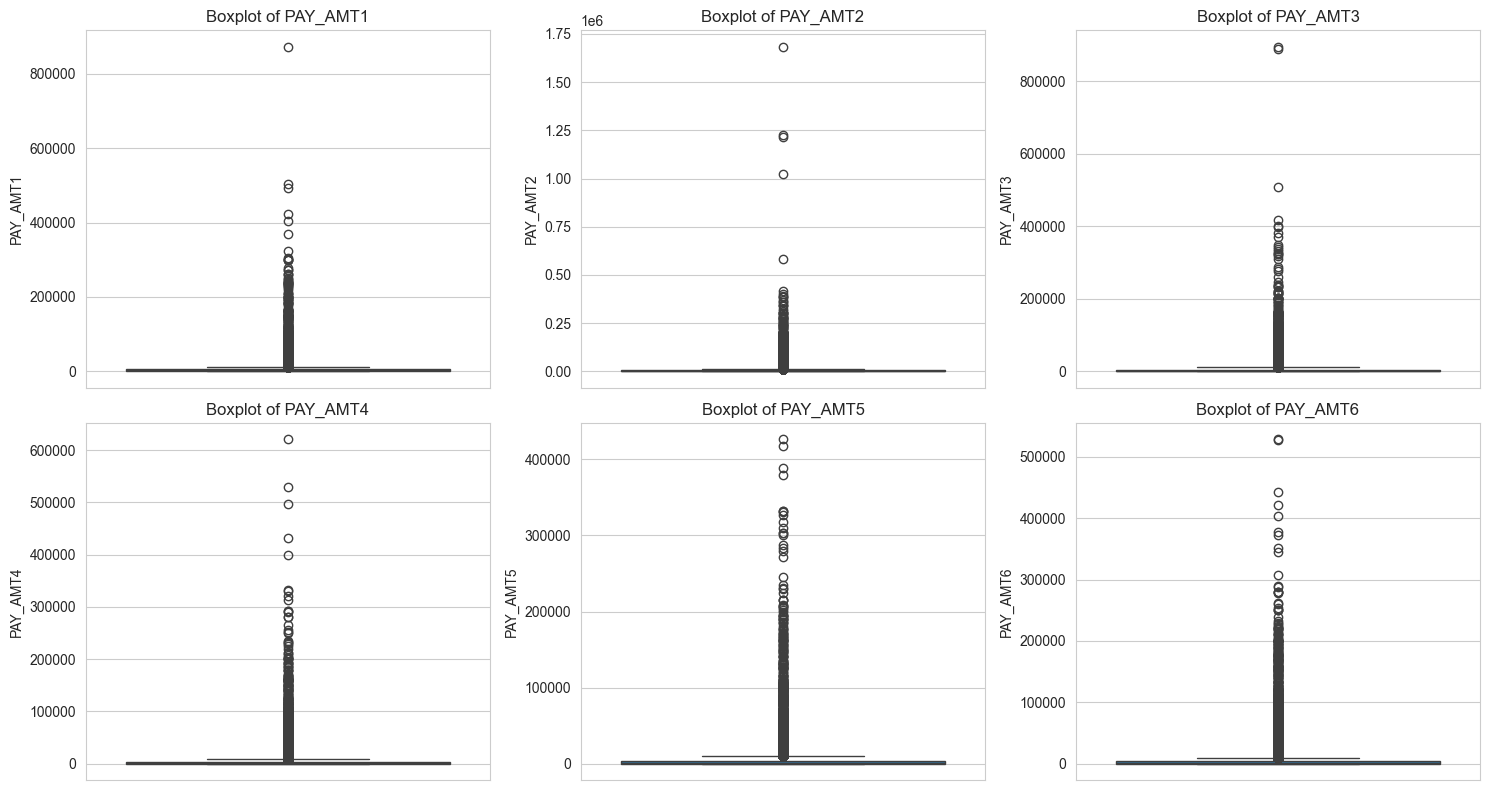

In [212]:
# List of PAY_AMT columns
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a figure to display multiple boxplots side by side
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Create a boxplot for each column in pay_cols
for idx, col in enumerate(pay_cols):
    plt.subplot(2, 3, idx + 1)  # 2 rows, 3 columns for displaying the plots
    sns.boxplot(y=df[col])  # Boxplot for each column
    plt.title(f'Boxplot of {col}')  # Title for each boxplot

# Adjust layout
plt.tight_layout()
plt.show()


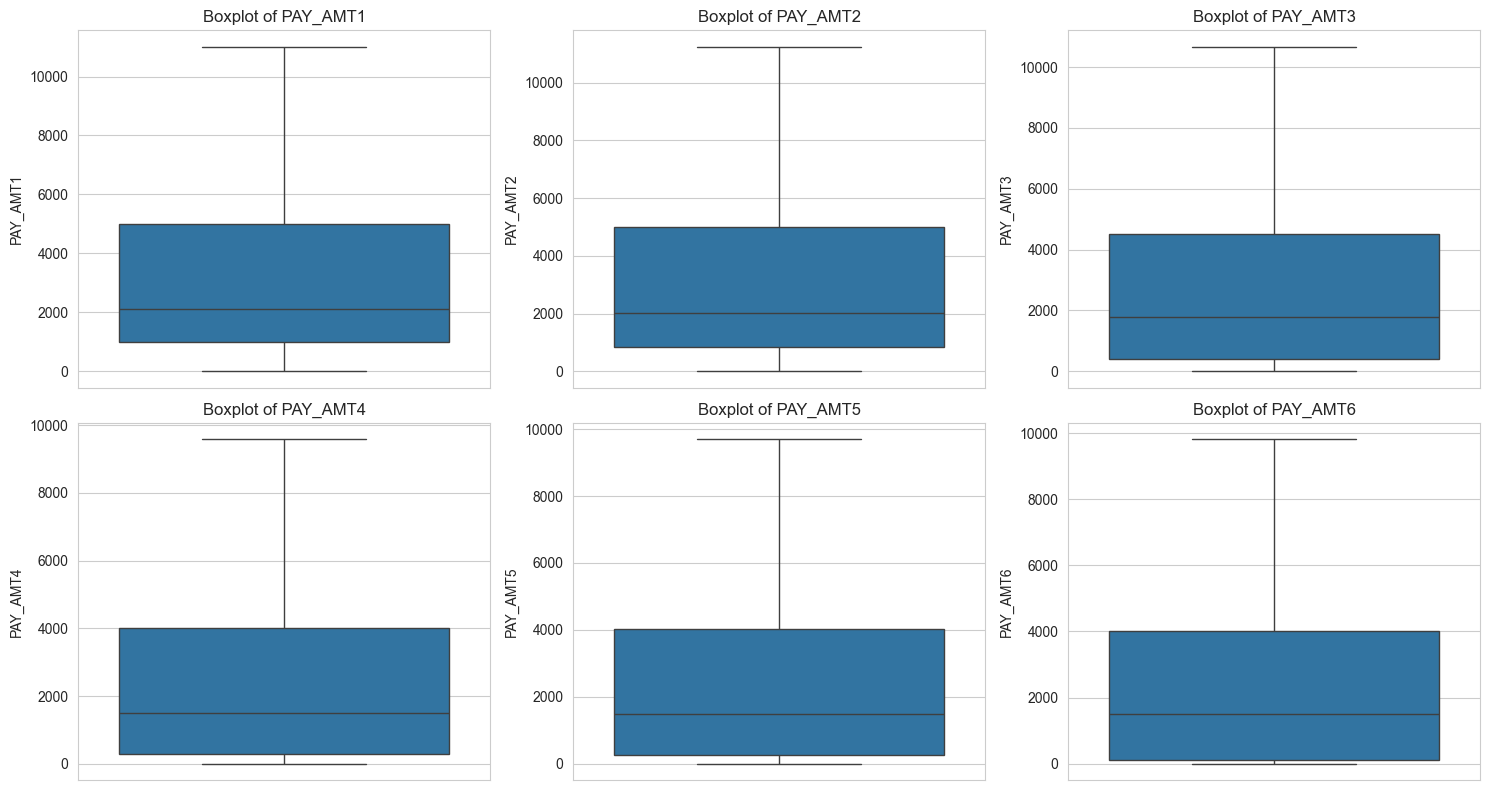

In [213]:
# As the visualization of outliers (circles in the boxplots) is too cluttered, we can filter or zoom in on certain values. 
# For example, let's exclude outliers with showfliers=False in sns.boxplot():
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

for idx, col in enumerate(pay_cols):
    plt.subplot(2, 3, idx + 1)  
    sns.boxplot(y=df[col], showfliers=False) 
    plt.title(f'Boxplot of {col}') 

# Adjust layout
plt.tight_layout()
plt.show()

Most of the payment amounts seem to be concentrated within a relatively small range, from 0 to 11,000 NT$. This indicates that most of the cardholders make payments within this range.

However, there are a few significant outliers, with values extending up to 1.75 million NT$ (see PAY_AMT2). These outliers are quite extreme and may represent either errors in data or rare, atypical cases, such as large lump-sum payments or reimbursements.

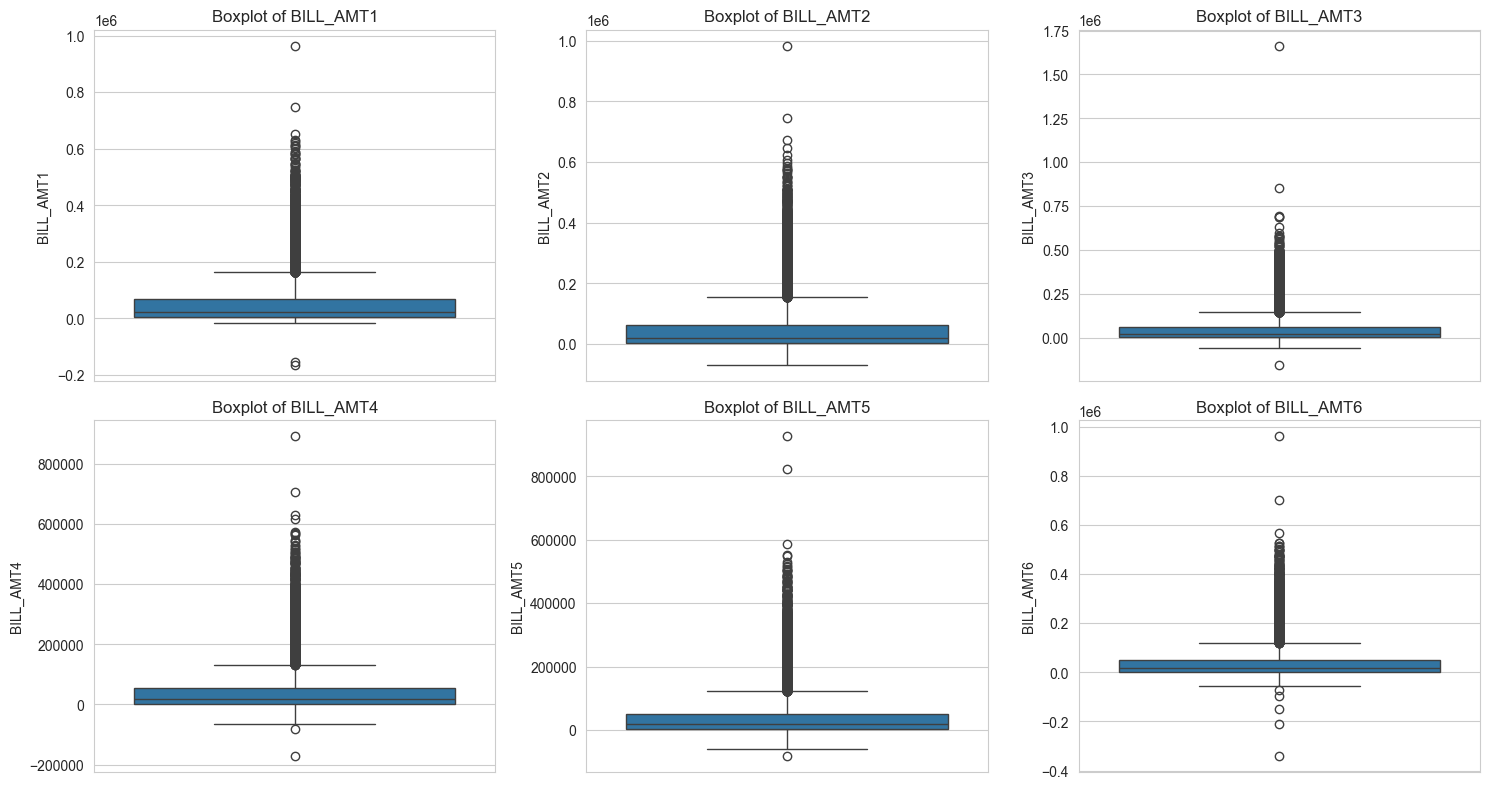

In [214]:
# List of BILL_AMTBILL_AMT<x> columns
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Create a figure to display multiple boxplots side by side
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Create a boxplot for each column in pay_cols
for idx, col in enumerate(bill_cols):
    plt.subplot(2, 3, idx + 1)  # 2 rows, 3 columns for displaying the plots
    sns.boxplot(y=df[col])  # Boxplot for each column
    plt.title(f'Boxplot of {col}')  # Title for each boxplot

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='default payment next month', ylabel='LIMIT_BAL'>

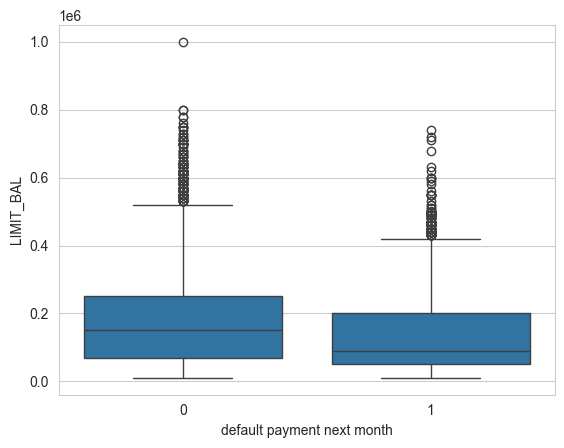

In [215]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)


#### Outliers detection with IQR (Interquartile Range) method
Let's identify outliers and then color them differently on a scatter plot using Python. 
We’ll do this using the IQR method (Interquartile Range), which is common and works well for basic outlier detection.

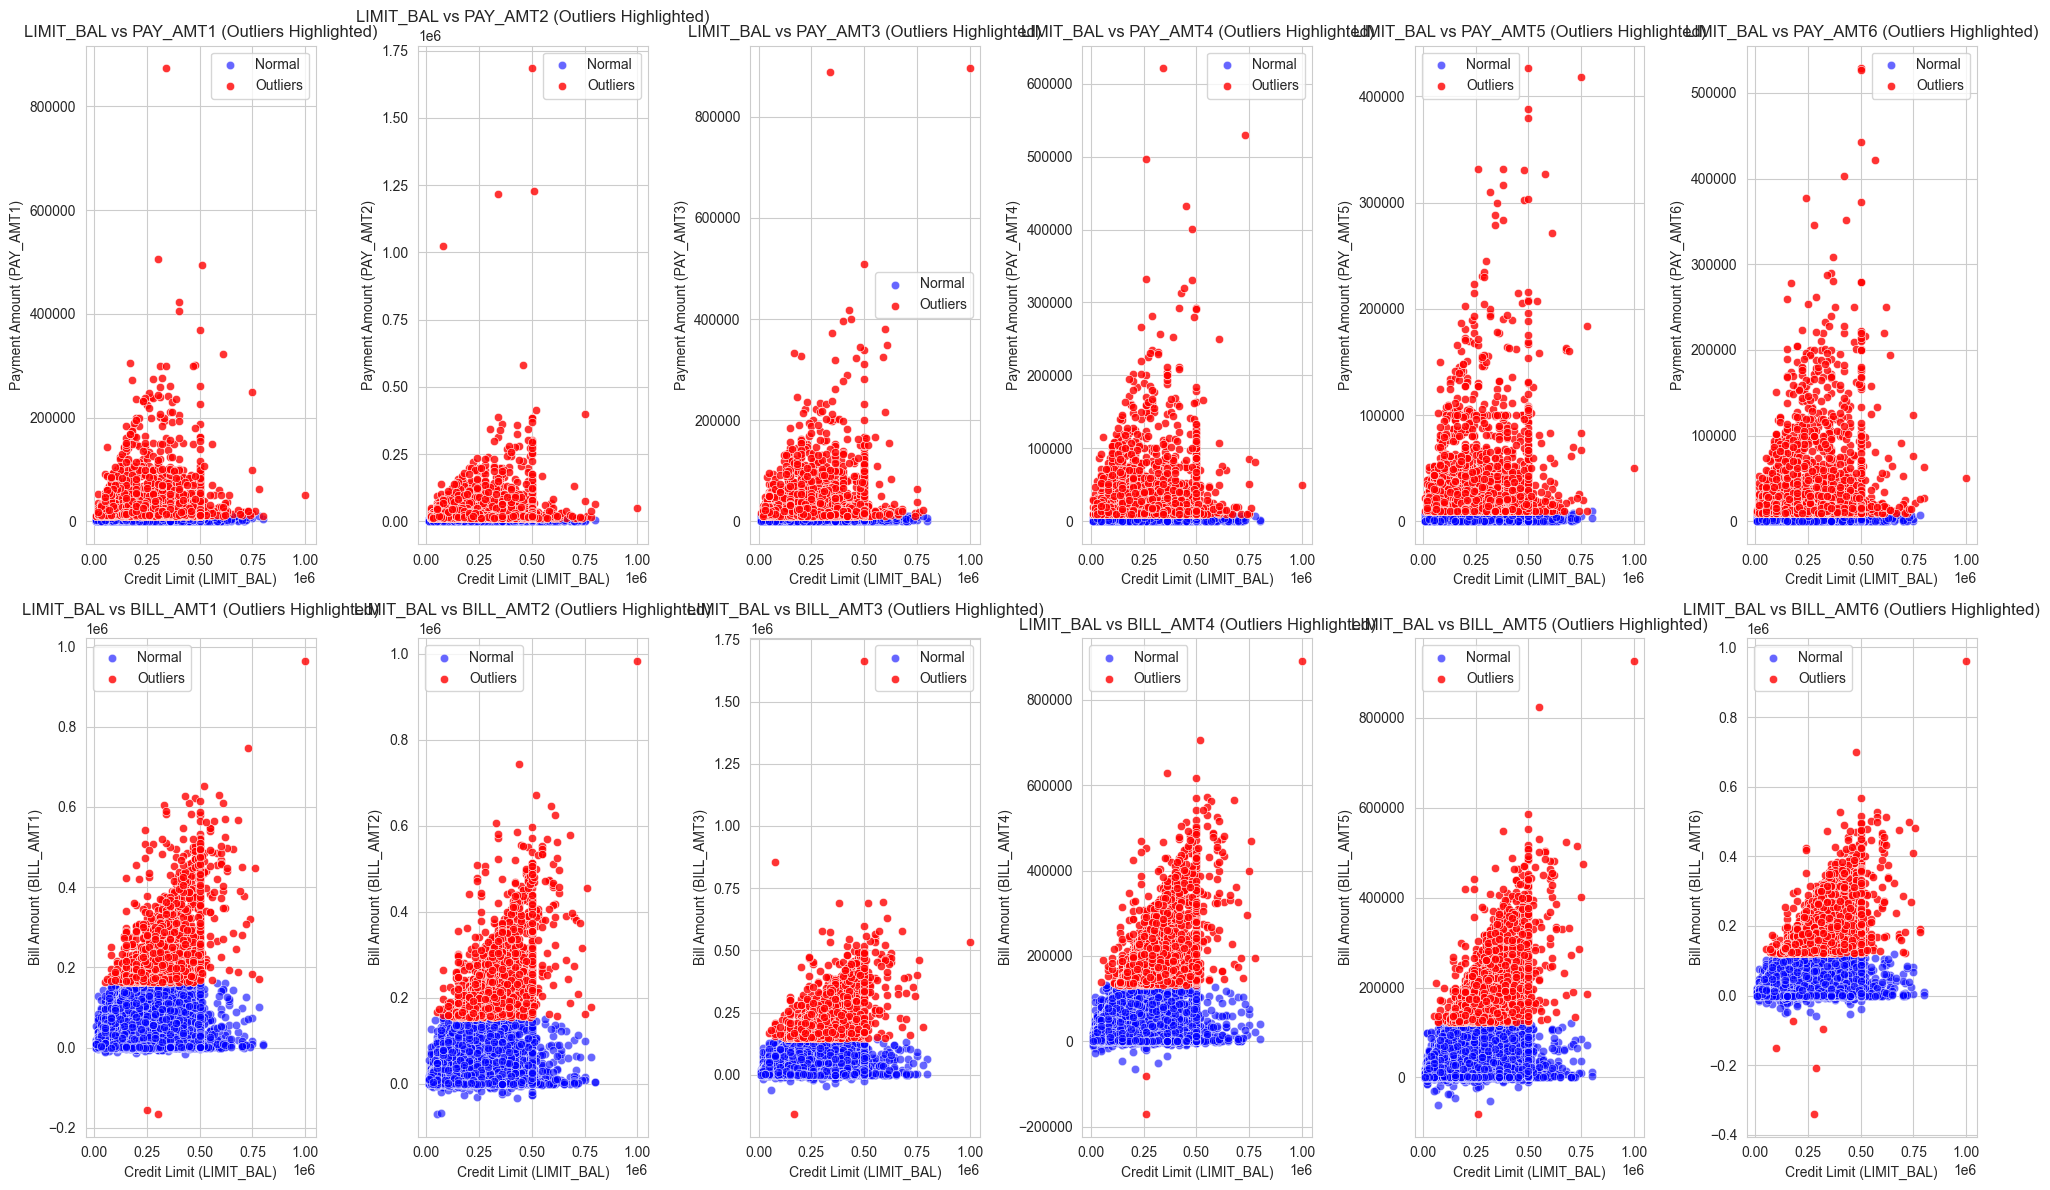

In [216]:
# Define the variables for plotting
x = df['LIMIT_BAL']

# Create subplots for each PAY_AMT and BILL_AMT
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# --- Step 1: Set up the subplots ---
fig, axes = plt.subplots(2, len(pay_cols), figsize=(20, 12))  # 2 rows, number of columns based on PAY_AMT or BILL_AMT

# --- Step 2: Loop over PAY_AMT columns ---
for i, pay_col in enumerate(pay_cols):
    y = df[pay_col]

    # Detect outliers using IQR for PAY_AMT
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (y < lower_bound) | (y > upper_bound)

    # Plot PAY_AMT vs LIMIT_BAL
    sns.scatterplot(x=x[~outliers], y=y[~outliers], label='Normal', color='blue', alpha=0.6, ax=axes[0, i])
    sns.scatterplot(x=x[outliers], y=y[outliers], label='Outliers', color='red', alpha=0.8, ax=axes[0, i])

    axes[0, i].set_title(f"LIMIT_BAL vs {pay_col} (Outliers Highlighted)")
    axes[0, i].set_xlabel("Credit Limit (LIMIT_BAL)")
    axes[0, i].set_ylabel(f"Payment Amount ({pay_col})")
    axes[0, i].legend()

# --- Step 3: Loop over BILL_AMT columns ---
for i, bill_col in enumerate(bill_cols):
    y = df[bill_col]

    # Detect outliers using IQR for BILL_AMT
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (y < lower_bound) | (y > upper_bound)

    # Plot BILL_AMT vs LIMIT_BAL
    sns.scatterplot(x=x[~outliers], y=y[~outliers], label='Normal', color='blue', alpha=0.6, ax=axes[1, i])
    sns.scatterplot(x=x[outliers], y=y[outliers], label='Outliers', color='red', alpha=0.8, ax=axes[1, i])

    axes[1, i].set_title(f"LIMIT_BAL vs {bill_col} (Outliers Highlighted)")
    axes[1, i].set_xlabel("Credit Limit (LIMIT_BAL)")
    axes[1, i].set_ylabel(f"Bill Amount ({bill_col})")
    axes[1, i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


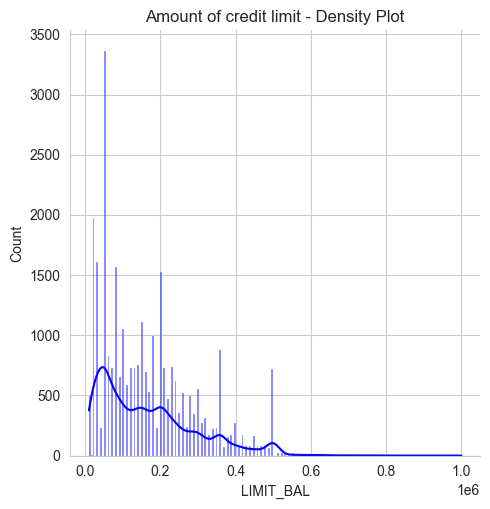

In [217]:
# Analyze the distribution of continuous variables
# Amount of credit limit - Density Plot
sns.set_color_codes("pastel")
sns.set_style(style='whitegrid')
sns.displot(df['LIMIT_BAL'],kde=True,bins=200, color="blue").set(title='Amount of credit limit - Density Plot')
plt.show()

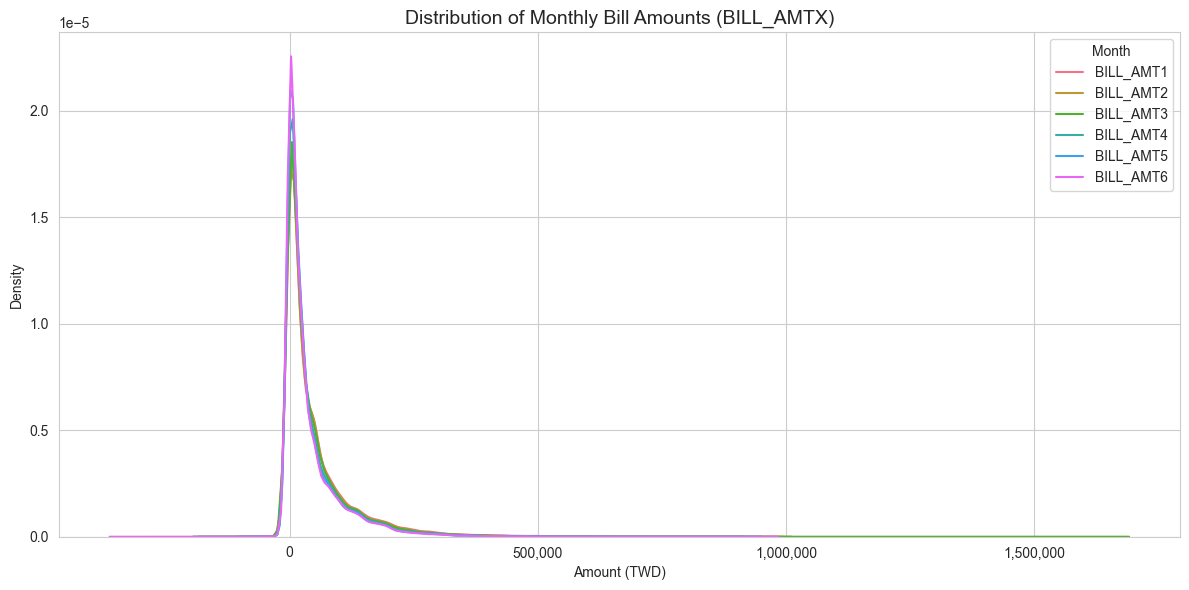

In [218]:
# Analyze the distribution of continuous variables
# Amount of credit limit - Density Plot

from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
colors = sns.color_palette("husl", len(bill_cols))

plt.figure(figsize=(12, 6))

for idx, col in enumerate(bill_cols):
    sns.kdeplot(
        df[col],  
        color=colors[idx], 
        label=col, 
        linewidth=1.5
    )

# Format x-axis ticks with thousands separators
def thousands(x, pos):
    return f'{int(x):,}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))

plt.title("Distribution of Monthly Bill Amounts (BILL_AMTX)", fontsize=14)
plt.xlabel("Amount (TWD)")
plt.ylabel("Density")
plt.legend(title="Month")
plt.tight_layout()
plt.show()


# 📌 Questions about the dataset variables:

### 1️⃣ Why is there no `PAY_1` variable?
The dataset contains `PAY_0` (September 2005), `PAY_2` (August 2005), `PAY_3` (July 2005), and so on. However, `PAY_1` is missing.  
- Was this an arbitrary decision by the dataset creators?  
- Or is there a specific reason why `PAY_1` was skipped?  

### 2️⃣ What does "paying on time" actually mean?
- If `PAY_X = 0`, does it mean the customer has **fully paid** their balance for that month?  
- Or does it simply mean they **paid the minimum required amount** to avoid being considered "late," even if they still have an outstanding balance?  
- Can a customer be marked as "on time" while still carrying past-due amounts from previous months?  

### 3️⃣ What does `PAY_X = n` mean?
- If `PAY_X = 2`, does it mean the customer was **late for 2 months before making a full payment**?  
- Or does it mean they were **at least 2 months behind and still had not fully paid off their past dues**?  

### 4️⃣ What do `PAY_X = -1` and `PAY_X = -2` represent?
- `PAY_X = -1` seems to indicate that the customer either **paid on time** or had **no payment due** that month. Is this correct?  
- `PAY_X = -2` might suggest that the customer had a **revolving credit account with no outstanding balance**, or maybe they even **paid in advance**. Could this be confirmed by analyzing the data?  

### 5️⃣ Understanding the `default.payment.next.month` column  

The `default.payment.next.month` column represents the **target variable** of this dataset. It indicates whether a customer **defaulted** on their payment in October 2005:  

- **0** → The customer **did not default** in October 2005.  
- **1** → The customer **defaulted** in October 2005.  

This is a **real observed value**, not a predicted one. The dataset aims to use the other variables (payment history, balance, age, etc.) to **predict this outcome**.  

🔍 Initially, it might seem like this column contains a precomputed prediction, but that is not the case. If it were, the dataset would only serve to evaluate prediction methods. Instead, since this is real historical data, we can train models to predict future payment defaults.

BUT, what are the conditions to say one is defaulting in this scenario?


Let's take an example: we will filter the table using PAY_2 (the repayment status for August 2005) to display all rows where df['PAY_2'] == -2. This will help us better understand what the value '-2' actually means.

In [219]:
df2 = df[df['PAY_2'] == -2]
df2[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_2','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','default payment next month']].sample(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default payment next month
22519,500000,2,1,1,36,-2,9241,10786,12376,10786,12390,12692,0
11754,160000,2,2,2,27,-2,0,0,6204,0,6204,0,0
7420,280000,2,2,2,31,-2,0,0,0,0,0,0,0
29430,200000,1,1,1,30,-2,3207,4347,2897,4360,2902,1432,0
16656,360000,1,1,2,34,-2,0,0,0,0,0,733,0
20244,300000,2,1,2,50,-2,22443,31175,26476,31175,26476,27782,0
6367,180000,2,2,1,37,-2,-1279,-2329,2115,0,4444,214,0
561,360000,2,2,2,52,-2,640,2113,-6,2231,0,1005,0
20002,200000,2,1,1,39,-2,5553,2294,359,2294,359,0,0
8858,180000,2,1,2,31,-2,0,0,0,0,0,0,1


From the analysis of the previous code, we gain a better understanding of how the BILL_AMTX and PAY_AMTX columns could be used to predict the likelihood of default payment in the following month.

For example, row 8239 provides the following information:

BILL_AMT2 = 5392, which is the bill amount (to be paid) for August 2005.

PAY_AMT2 = 5151, which is the amount actually paid in July 2005.

PAY_AMT1 = 5392, which is the amount paid and observed a month later (September 2005), representing the payment made for August 2005.

Thus, we can observe how much the client owed (as seen in the value BILL_AMTX) and how much they actually paid a month later (as seen in the value PAY_AMTX-1).

Now, let's see all the df[default payment next month]==1 for df['PAY_0'], df['PAY_2'], df['PAY_3'], df['PAY_4'], df['PAY_5'], df['PAY_6'] where :

PAY_0 represent the repayment status for September 2005 
    (-2=to be determined, 
    -1=pay duly, 
    0= to be determnied, 
    1=payment delay for one month, 
    2=payment delay for two months, 
    … , 
    8=payment delay for eight months, 
    9=payment delay for nine months and above). 

PAY_2 represent the repayment status for August 2005, 

PAY_3 represent the repayment status for July 2005, 

PAY_4 represent the repayment status for June 2005, 

PAY_5 represent the repayment status for May 2005, 

PAY_6 represent the repayment status for April 2005. 

In [220]:
df2 = df[df['default payment next month'] == 1]
df2.sample(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
27473,27474,150000,1,2,1,51,2,2,0,0,2,2,17307,16736,17491,24882,25229,24688,0,1329,7720,1051,0,1987,1
15401,15402,470000,2,2,1,49,0,-1,-1,-1,-1,-1,3388,1359,7650,6682,1942,0,1359,7650,6682,1942,0,5870,1
10597,10598,100000,1,3,1,30,2,2,2,2,0,0,68436,66783,74555,72759,74131,75603,0,9557,0,2700,2707,3120,1
4277,4278,360000,2,1,2,29,-1,-1,-1,-2,-2,-2,1146,2500,0,0,0,0,2500,0,0,0,0,0,1
8812,8813,70000,1,1,1,49,-1,-1,-1,-1,-1,-1,1261,2041,1261,2431,904,1801,2431,1261,2431,904,2191,0,1
18508,18509,80000,2,1,2,24,0,0,0,2,0,0,4711,5737,8818,8471,8644,8820,1266,3347,0,173,176,180,1
13105,13106,360000,2,1,1,41,1,-1,-1,-2,-1,-1,0,105,0,0,71,77,105,0,0,71,77,100,1
14349,14350,340000,1,2,1,43,1,-2,-2,-2,-2,-2,-15,-15,-15,-15,-15,-15,0,0,0,0,0,0,1
18791,18792,110000,2,2,2,29,2,0,0,0,0,0,113394,108142,109325,111264,56311,58271,5314,4398,4196,1857,8271,1948,1
3782,3783,120000,2,1,2,28,-1,-1,2,0,0,-1,200,1986,1117,425,-267,1451,1986,0,0,0,2210,0,1


<Axes: xlabel='default_status', ylabel='count'>

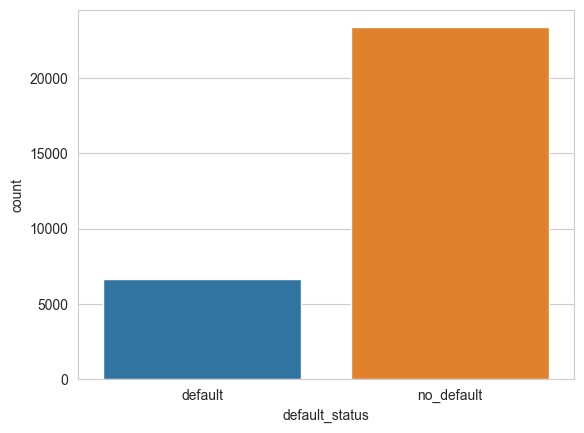

In [221]:
df['default_status'] = np.where(df['default payment next month'] == 0 ,'no_default' ,'default')
sns.countplot(x = 'default_status', data = df, hue = 'default_status')

In [222]:
#The following simple calculus can also help with counting how many default payment there are: 
print(df['default payment next month'].sum(), 'out of', df['default payment next month'].count())

6636 out of 30000


In [223]:
#The following simple calculus can also help with counting how many female and male clients there are: 

counts = df['SEX'].value_counts()
print(type(counts)) # avec value_counts() on a une Series Pandas

print(f"There are {counts.get(2,0)} women and {counts[1]} men out of {counts[1] + counts[2]} clients.")
# counts.get(2, 0) retourne le résultat (ou 0 si 2 n'existe pas)
# counts[1] accède à la series pandas counts, et retourne la valeur pour laquelle l'index est 1


<class 'pandas.core.series.Series'>
There are 18112 women and 11888 men out of 30000 clients.


<Axes: xlabel='SEX', ylabel='count'>

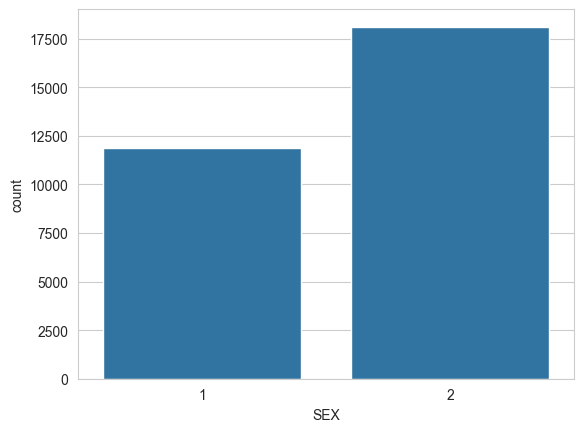

In [224]:
sns.countplot(x = 'SEX', data = df)

<Axes: xlabel='default_status', ylabel='count'>

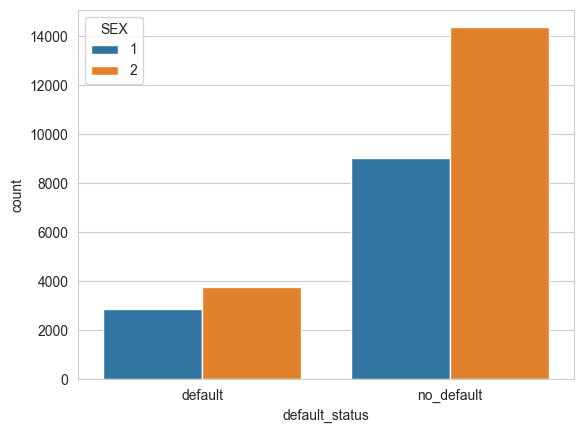

In [225]:
sns.countplot(x = 'default_status', data = df, hue = 'SEX')

<Axes: xlabel='MARRIAGE', ylabel='count'>

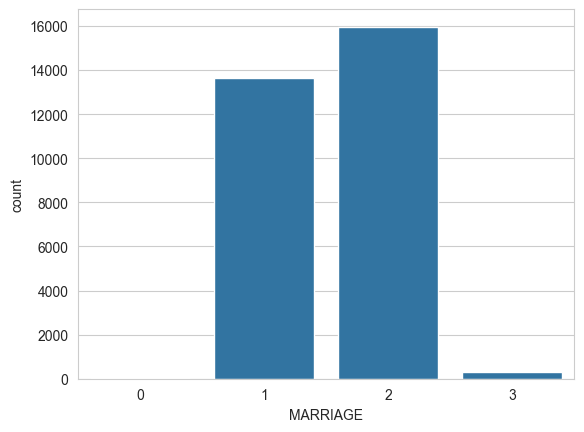

In [226]:
sns.countplot(x = 'MARRIAGE', data = df)

In [227]:
print(df['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


<Axes: xlabel='AGE', ylabel='Count'>

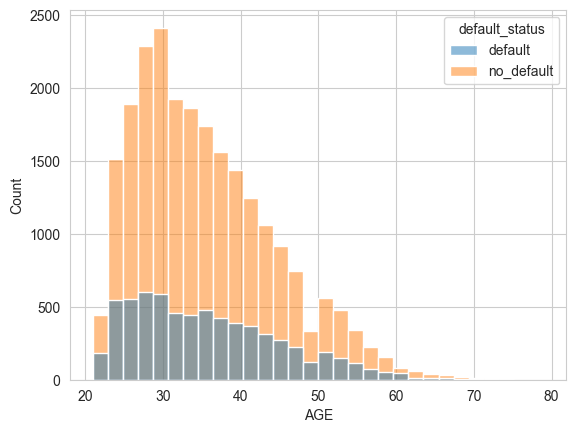

In [228]:
sns.histplot(data = df, x = 'AGE', bins = 30, hue = 'default_status')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

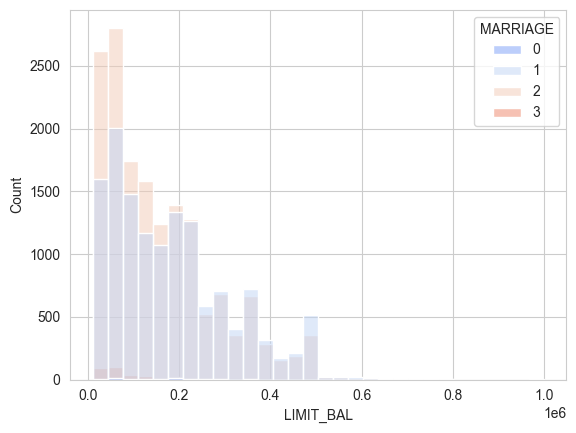

In [229]:
sns.histplot(data = df, x = 'LIMIT_BAL', bins = 30, hue = 'MARRIAGE', palette='coolwarm')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

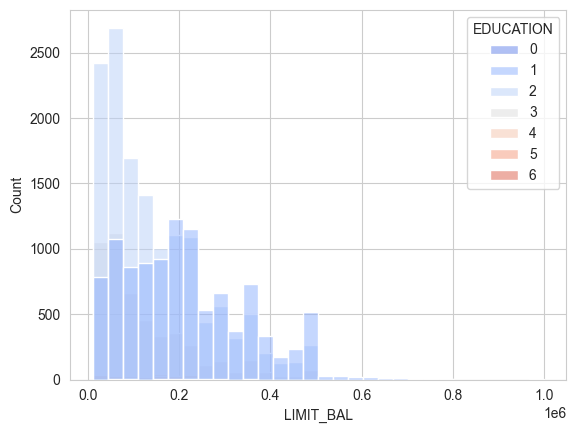

In [230]:
sns.histplot(data = df, x = 'LIMIT_BAL', bins = 30, hue = 'EDUCATION', palette='coolwarm')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

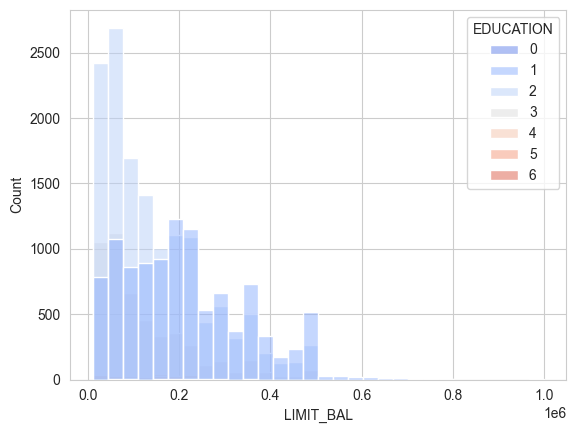

In [231]:
sns.histplot(data = df, x = 'LIMIT_BAL', bins = 30, hue = 'EDUCATION', palette='coolwarm')

<Axes: xlabel='EDUCATION', ylabel='count'>

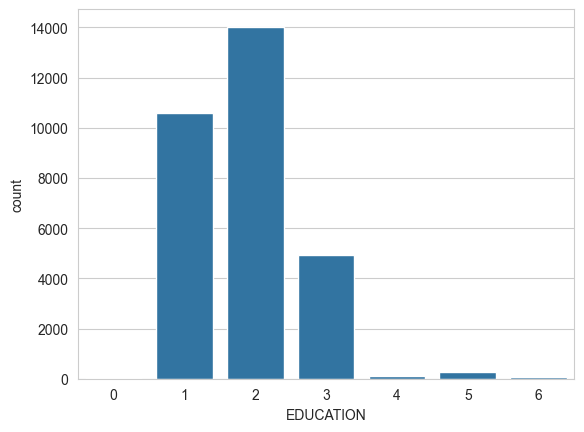

In [232]:
sns.countplot(x = 'EDUCATION', data = df)

In [233]:
#For simplicity's sake, let's group negligible values in an “Other” category for the EDUCATION and MARRIAGE columns.

df['EDUCATION'] = df['EDUCATION'].replace({0: 0, 4: 0, 5: 0, 6: 0})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 0, 3: 0})

/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_3273/1966331035.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['EDUCATION'] = df['EDUCATION'].replace({0: 0, 4: 0, 5: 0, 6: 0})
/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_3273/1966331035.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MARRIAGE'] = df['MARRIAGE'].replace({0: 0, 3: 0})


<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

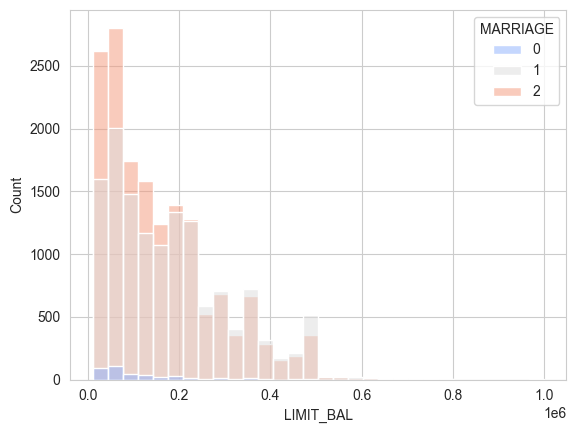

In [234]:
sns.histplot(data = df, x = 'LIMIT_BAL', bins = 30, hue = 'MARRIAGE', palette='coolwarm')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

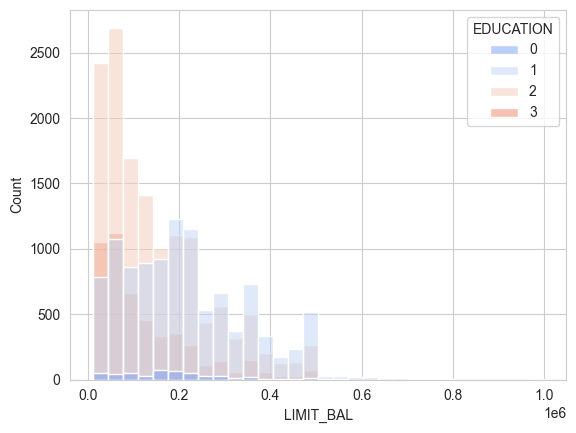

In [235]:
sns.histplot(data = df, x = 'LIMIT_BAL', bins = 30, hue = 'EDUCATION', palette='coolwarm')

<Figure size 1000x500 with 0 Axes>

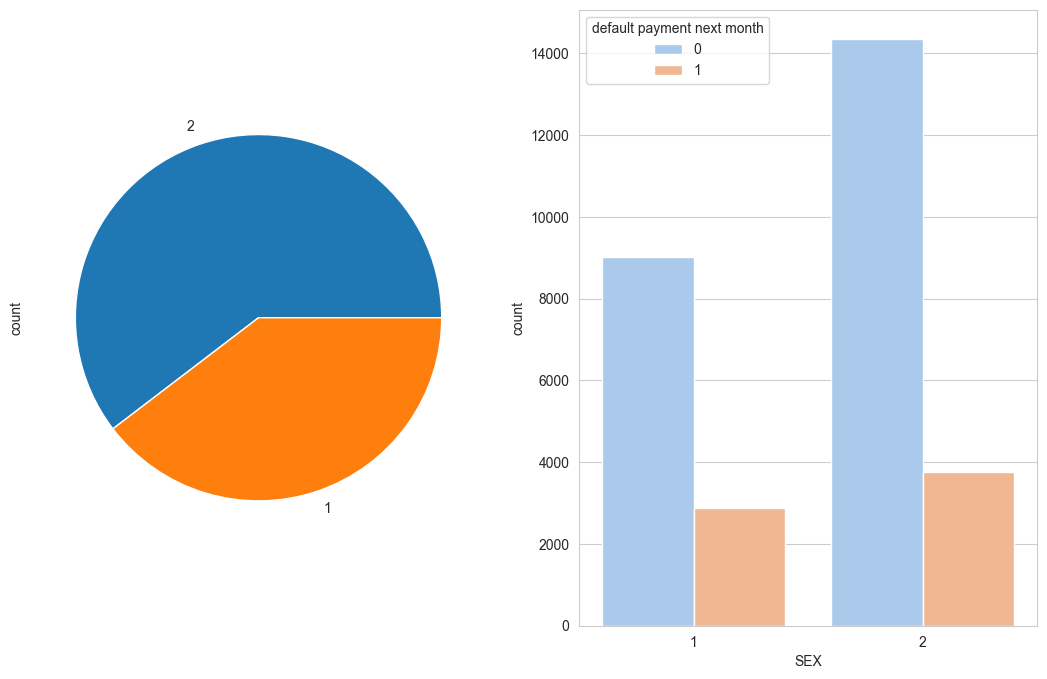

<Figure size 1000x500 with 0 Axes>

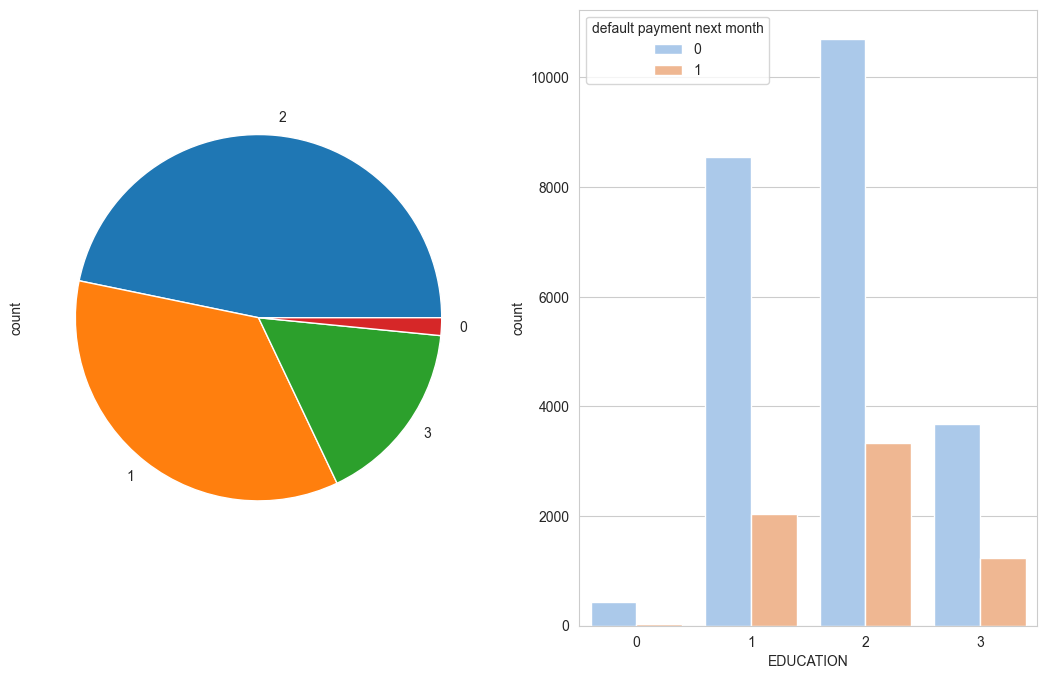

<Figure size 1000x500 with 0 Axes>

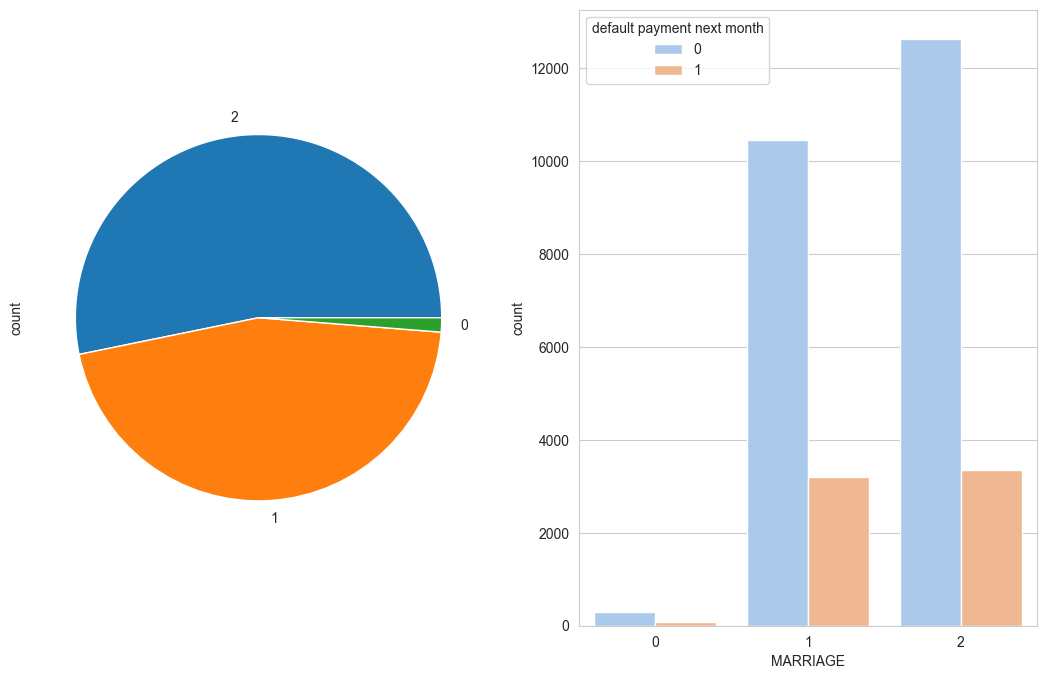

In [236]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in cat_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'default payment next month', data = df, palette='pastel')

## Observation
There are more females credit card holder, so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

<Axes: xlabel='LIMIT_BAL'>

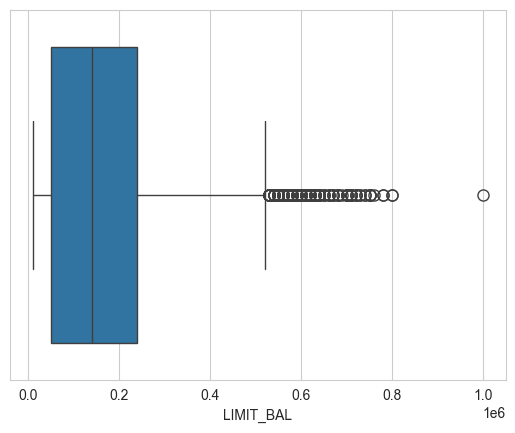

In [237]:
sns.boxplot(data=df, x='LIMIT_BAL', 
            fliersize=5, 
            flierprops=dict(marker='o', color='blue', markersize=8))


<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

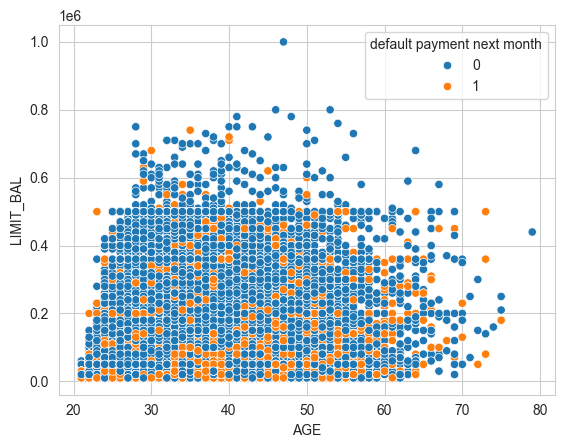

In [238]:
sns.scatterplot(data = df, y = 'LIMIT_BAL', x = 'AGE', hue = 'default payment next month')

<Axes: xlabel='EDUCATION', ylabel='count'>

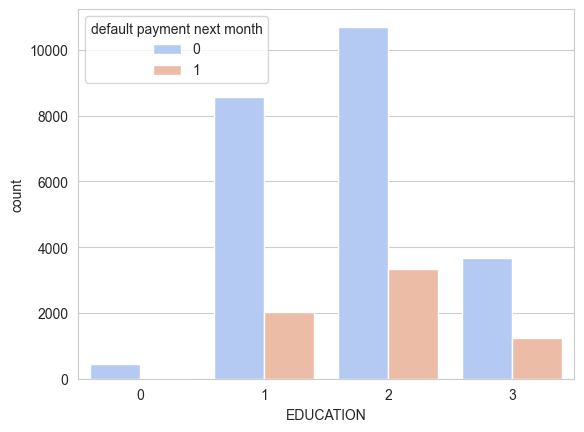

In [239]:
sns.countplot(x = 'EDUCATION', data = df, hue = 'default payment next month', palette="coolwarm")

As a reminder :



Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

<Axes: xlabel='MARRIAGE', ylabel='count'>

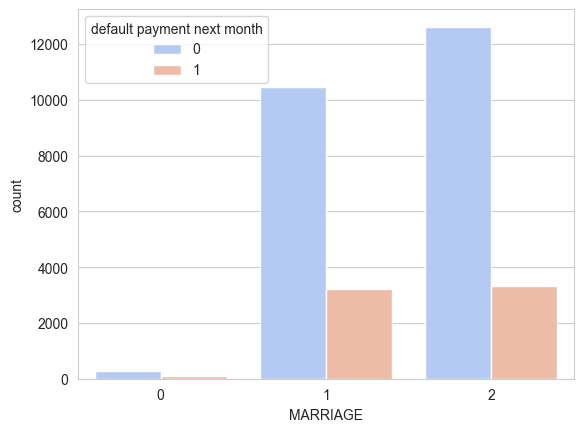

In [240]:
sns.countplot(x = 'MARRIAGE', data = df, hue = 'default payment next month', palette="coolwarm")

Let's drop down some not so relevant columns to have cleaner data. 

<Axes: xlabel='default payment next month', ylabel='LIMIT_BAL'>

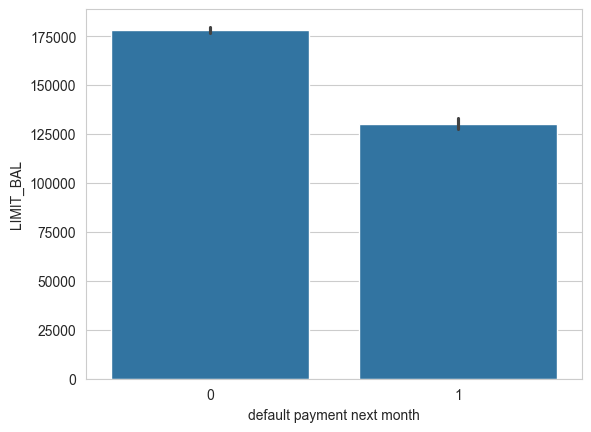

In [241]:
sns.barplot(x='default payment next month', y='LIMIT_BAL', data=df)

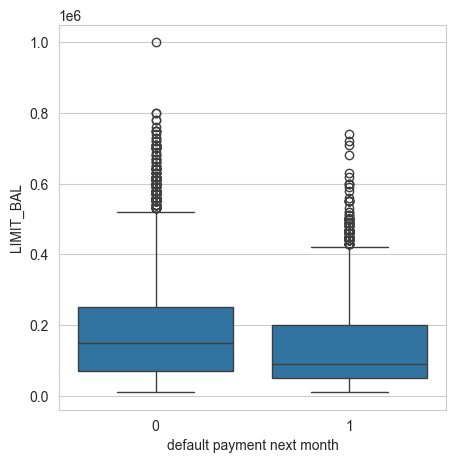

In [242]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df)

In [243]:
#renaming columns 

df.rename(columns={'PAY_0':'PAYSTATUS_SEPT','PAY_2':'PAYSTATUS_AUG','PAY_3':'PAYSTATUS_JUL','PAY_4':'PAYSTATUS_JUN','PAY_5':'PAYSTATUS_MAY','PAY_6':'PAYSTATUS_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_FOR_AUG','PAY_AMT2':'PAY_AMT_FOR_JUL','PAY_AMT3':'PAY_AMT_FOR_JUN','PAY_AMT4':'PAY_AMT_FOR_MAY','PAY_AMT5':'PAY_AMT_FOR_APR','PAY_AMT6':'PAY_AMT_FOR_MAR'},inplace=True)

df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {0 : 'others', 1 : 'graduate school', 2 : 'university', 3 : 'high school'}, 'MARRIAGE' : {0 : 'others', 1 : 'married', 2 : 'single'}}, inplace = True)

/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_3273/137834030.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {0 : 'others', 1 : 'graduate school', 2 : 'university', 3 : 'high school'}, 'MARRIAGE' : {0 : 'others', 1 : 'married', 2 : 'single'}}, inplace = True)
/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_3273/137834030.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {0 : 'others', 1 : 'graduate school', 2 : 'un

In [244]:
df.sample(50)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYSTATUS_SEPT,PAYSTATUS_AUG,PAYSTATUS_JUL,PAYSTATUS_JUN,PAYSTATUS_MAY,PAYSTATUS_APR,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_FOR_AUG,PAY_AMT_FOR_JUL,PAY_AMT_FOR_JUN,PAY_AMT_FOR_MAY,PAY_AMT_FOR_APR,PAY_AMT_FOR_MAR,default payment next month,default_status
15059,15060,70000,MALE,high school,married,34,0,0,0,0,0,0,...,66566,56942,58986,61031,3000,3002,2500,3000,3000,2502,0,no_default
1205,1206,210000,FEMALE,university,married,29,0,0,0,0,0,0,...,51353,43485,44784,45685,5088,2000,1600,2000,1800,1807,1,default
22717,22718,500000,FEMALE,high school,single,44,-2,-2,-2,-2,-2,-2,...,0,0,1300,0,1275,0,0,1300,0,0,0,no_default
10562,10563,190000,MALE,university,married,36,0,0,0,0,0,0,...,82179,80874,81720,87685,7007,2912,2871,3501,8001,3234,0,no_default
20288,20289,60000,FEMALE,high school,married,51,0,0,0,0,0,0,...,60557,35555,30214,30170,2435,2575,1404,990,1347,1316,0,no_default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,9354,140000,MALE,graduate school,single,28,0,0,0,-1,-1,-1,...,24460,435,435,435,1457,1000,435,435,435,435,0,no_default
17912,17913,150000,MALE,high school,single,44,0,0,0,0,0,0,...,147851,151310,107033,109350,6913,5937,6500,4000,4000,4000,0,no_default
1616,1617,20000,MALE,university,others,35,1,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0,1,default
10667,10668,150000,MALE,university,single,45,-1,-1,-2,-1,-1,-1,...,0,159,14903,410,0,0,159,14903,509,0,0,no_default


In [245]:
# Reverse the melt
# Pivot the melted DataFrame to get back to the original format
def payment_info(x):
    # Filter the data for a specific client based on their ID
    filtered_df = df[df['ID'] == x]
    
    if filtered_df.empty:
        print(f"No data found for ID {x}")
        return None
    
    # Extract key information
    age = filtered_df['AGE'].iloc[0]
    sex = filtered_df['SEX'].iloc[0].capitalize()  # Keep 'Male' or 'Female'
    education = filtered_df['EDUCATION'].iloc[0].capitalize()
    marital_status = filtered_df['MARRIAGE'].iloc[0].capitalize()
    limit_bal = filtered_df['LIMIT_BAL'].iloc[0]
    default_status = filtered_df['default_status'].iloc[0]
    
    # Display general information
    print(f"ID number {x} is a {age}-year-old {sex} person, whose marital status is {marital_status},")
    print(f"education level is {education}, with a credit limit of {limit_bal} NTD.")
    print(f"Default payment status: {default_status}.\n")
    
    # Create the table with the desired column data
    months = ['April', 'May', 'June', 'July', 'August', 'September']
    repayment_status = [
        filtered_df['PAYSTATUS_APR'].iloc[0], # The result can be a series, not just the raw value 0. 
        filtered_df['PAYSTATUS_MAY'].iloc[0], # This may cause problems if we expect a simple integer.
        filtered_df['PAYSTATUS_JUN'].iloc[0], # So we secure with .iloc[0]
        filtered_df['PAYSTATUS_JUL'].iloc[0], # .values[0] is an alternative to .iloc[0], giving the raw value directly.
        filtered_df['PAYSTATUS_AUG'].iloc[0],
        filtered_df['PAYSTATUS_SEPT'].iloc[0]
    ]
    bill_amt = [
        filtered_df['BILL_AMT_APR'].iloc[0],
        filtered_df['BILL_AMT_MAY'].iloc[0],
        filtered_df['BILL_AMT_JUN'].iloc[0],
        filtered_df['BILL_AMT_JUL'].iloc[0],
        filtered_df['BILL_AMT_AUG'].iloc[0],
        filtered_df['BILL_AMT_SEPT'].iloc[0]
    ]
    pay_amt_past_month = [
        filtered_df['PAY_AMT_FOR_MAR'].iloc[0],
        filtered_df['PAY_AMT_FOR_APR'].iloc[0],
        filtered_df['PAY_AMT_FOR_MAY'].iloc[0],
        filtered_df['PAY_AMT_FOR_JUN'].iloc[0],
        filtered_df['PAY_AMT_FOR_JUL'].iloc[0],
        filtered_df['PAY_AMT_FOR_AUG'].iloc[0]
    ]
    
    # Build the DataFrame
    payment_info = pd.DataFrame({
        'Month': months,
        'Repayment Status': repayment_status,
        'BILL_AMT': bill_amt,
        'PAY_AMT_PAST_MONTH': pay_amt_past_month
    })
    
    return payment_info


In [246]:
payment_info(314)

ID number 314 is a 49-year-old Female person, whose marital status is Married,
education level is High school, with a credit limit of 200000 NTD.
Default payment status: default.



,Month,Repayment Status,BILL_AMT,PAY_AMT_PAST_MONTH
0,April,0,59983,3000
1,May,0,58657,2286
2,June,2,54723,5000
3,July,2,56205,0
4,August,2,51040,6000
5,September,-1,52439,0


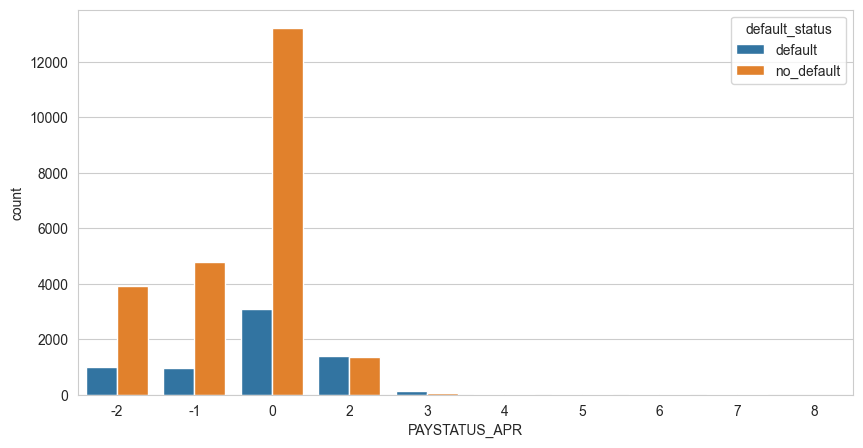

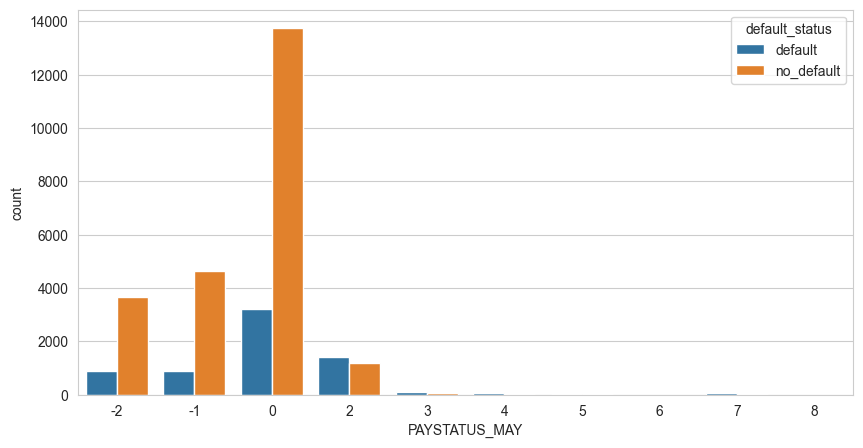

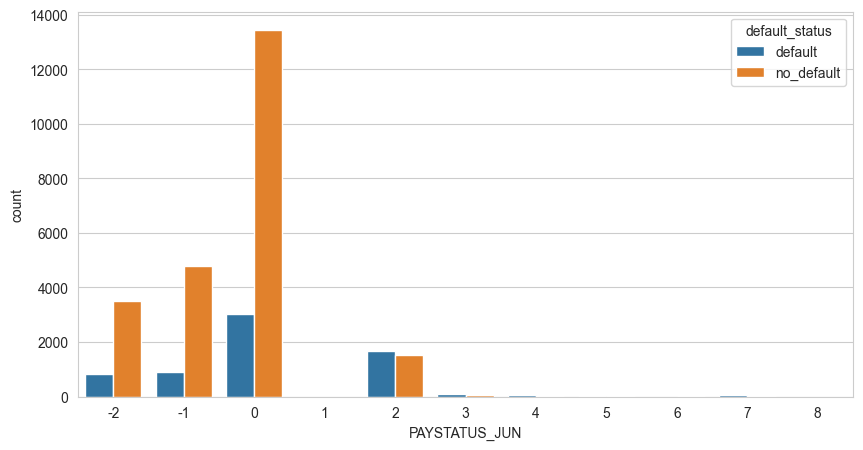

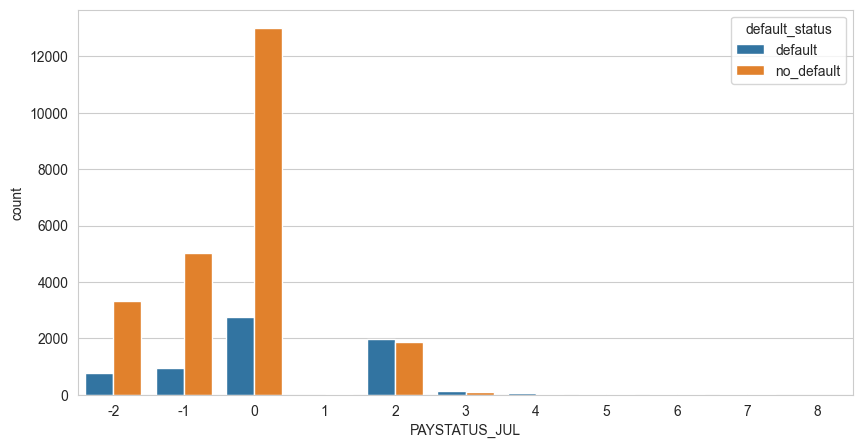

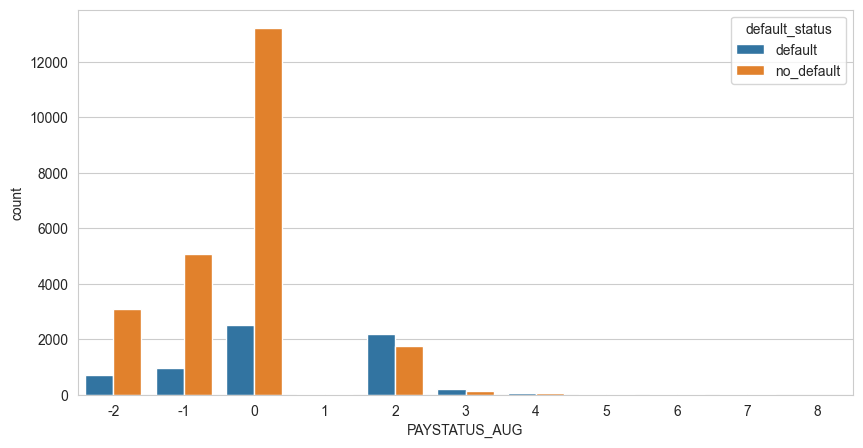

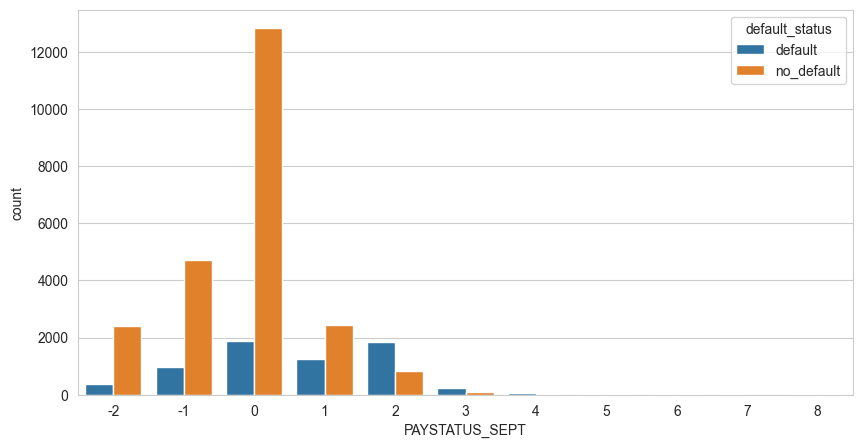

In [247]:
paystatus = ['PAYSTATUS_APR','PAYSTATUS_MAY','PAYSTATUS_JUN','PAYSTATUS_JUL','PAYSTATUS_AUG','PAYSTATUS_SEPT']

for col in paystatus:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_status', data = df)

## Visualisation with Tableau
Click the following link to check the visuals on Tableau Public : https://public.tableau.com/views/CreditCardPaymentDefault-CreditLimitsandDefaultProfiles/CreditLimitsDefaultProfiles?:language=fr-FR&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

![alt text](./Default_in_October_by_Pay_Status_1.png "Title")


![alt text](./Dashboard_Credit_Card_Payment_Default.png "Title")

![alt text](./Credit_Limits_&_Default_Profiles.png "Title")


# PART II: Machine learning

This is a classification problem and this means that we can use the following algorithms:

- Logistic regression
- Decision tree
- Random forest
- Support Vector Classifications
- Stocastic Gradient Descend
- Nearest Neighbours Classifiers
- Gaussian Process Classification
- Other ensemble
- Neural Network Models
- XGBoost

## Logistic Regression

# BIBLIOGRAPHY

https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719?via%3Dihub

"At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts."

"Credit risk here means the **probability of a delay in the repayment of the credit granted** (Paolo, 2001)."